In [2]:
import os
import pandas as pd  # Assuming pandas is also required for your script

root_dir = "/kaggle/input/mango-leaf/MangoLeafBD Dataset"

file_paths = []
labels = []

for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)
    for image_name in os.listdir(class_dir):
        file_paths.append(os.path.join(class_dir, image_name))
        labels.append(class_name)

df = pd.DataFrame({"file_path": file_paths, "label": labels})
df = df.sample(frac=1).reset_index(drop=True)


Class: Cutting Weevil, Count: 500
Class: Healthy, Count: 500
Class: Bacterial Canker, Count: 500
Class: Sooty Mould, Count: 500
Class: Powdery Mildew, Count: 500
Class: Die Back, Count: 500
Class: Anthracnose, Count: 500
Class: Gall Midge, Count: 500


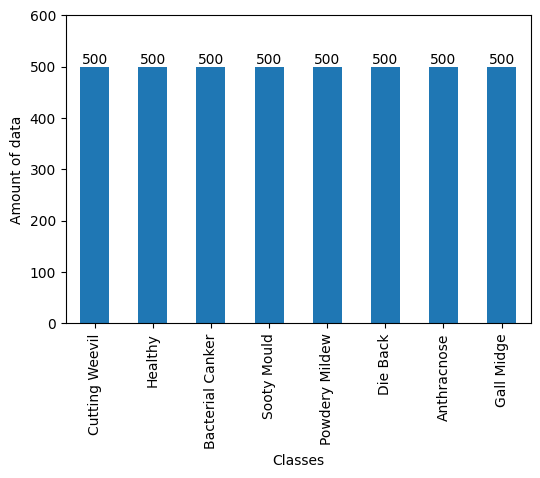

In [5]:
import matplotlib.pyplot as plt

class_counts_df = df['label'].value_counts()

for class_name, count in class_counts_df.items():
    print(f"Class: {class_name}, Count: {count}")

plt.figure(figsize=(6, 4))
ax = class_counts_df.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Amount of data')
plt.xticks(rotation=90)
for i, count in enumerate(class_counts_df):
    ax.text(i, count + 5, str(count), ha='center')
plt.ylim(0, max(class_counts_df) * 1.2)
plt.show()


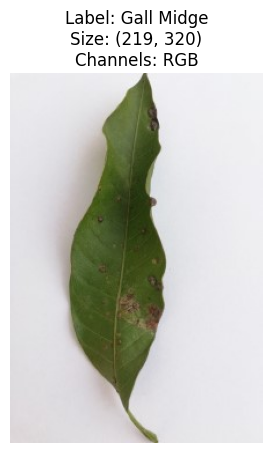

In [7]:
import random
from PIL import Image  # Ensure you also import PIL.Image if not already done
import matplotlib.pyplot as plt

random_index = random.randint(1, len(df) - 1)
random_row = df.iloc[random_index]

file_path = random_row['file_path']
label = random_row['label']

image = Image.open(file_path)

size = image.size
channels = 'Grayscale' if image.mode == 'L' else 'RGB'
plt.title(f"Label: {label}\nSize: {size}\nChannels: {channels}")
plt.imshow(image)
plt.axis('off')
plt.show()


In [8]:
# Check if file paths exist
missing_files = [path for path in df['file_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")

# Check for duplicate entries
print(f"Duplicate rows: {df.duplicated().sum()}")


Missing files: 0
Duplicate rows: 0
